In [1]:
# To enable the autocomplete feature based upon clicking the TAB button
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Rest API call

In [3]:
import requests
import json

In [4]:
baseurl = 'http://localhost:8080'
headers = 'application/json'

default_casebase = 'support_prim_cb_latest'
default_concept = 'patient'
default_globalSim='global_sim_1'

default_cases_limit=-1 

### Get all instances from a given casebase - GET call

In [5]:
#%%time
casebase_name_gai = 'support_prim_cb_latest'

def getAllInstances():
    url_gai = baseurl+'/instances?casebaseName='+casebase_name_gai
    
    response_gai = requests.get( url=url_gai)
    
    response_json_gai = response_gai.json()
        
    df_response_gai = pd.DataFrame(response_json_gai)
            
    # for sorting
    # df_response = df_response.sort_values(by=['caseID'], ascending=[False])
    
    return df_response_gai

getAllInstances().head();

In [6]:
instances = getAllInstances()
print( instances.shape)
instances.head()

(258, 58)


,activity_1,age,bmi,body_main,caseID,comob_otherspec,comorbidities,education,employment_1,eq5d_questions,...,sbt_sum_1,sleep15D_1,smoking,spadi_total_1,treat_belief,treatment_12m,vital15D_1,walkaid_1,work_ability_1,work_type_1
0,Slightly reduced,46,25.909456,Back,patient132,.;,other;,High school,Working and no welfare,_unknown_,...,2,sleep normally,No,_unknown_,totally agree,None treatments last 12 months,slightly weary,No,9,Work demands much walking and lifting
1,Slightly reduced,31,24.02381,Back,patient253,Hypofunksjon L3-L5.;,other;,More than 4 years higher education,Working and no welfare,_unknown_,...,2,sleep normally,No,_unknown_,totally agree,None treatments last 12 months,healthy and energetic,No,9,Mostly seated
2,Slightly reduced,70,27.774271,Neck,patient131,.;,dizziness;headache;,More than 4 years higher education,Other: Student - retiree - non_paid work,_unknown_,...,_unknown_,sleep normally,No,_unknown_,totally agree,More than 10 treatments last 12 months,slightly weary,No,6,Mostly seated
3,Slightly reduced,37,24.280975,Neck,patient252,.;,headache;,More than 4 years higher education,Working and no welfare,_unknown_,...,_unknown_,slight problem,No,_unknown_,totally agree,1-5 treatments last 12 months,moderately weary,No,9,Mostly seated
4,Slightly reduced,22,20.438166,Shoulder,patient130,.;,_unknown_,Primary school or less,Working and no welfare,_unknown_,...,_unknown_,slight problem,No,19.23077,totally agree,None treatments last 12 months,healthy and energetic,No,9,Work demands much walking


In [7]:
case_inst = instances.copy(deep=True)
case_inst = case_inst.set_index( case_inst.caseID )
case_inst.drop( columns='caseID', inplace=True)
case_inst.replace('_unknown_', np.NaN, inplace=True)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst.gpe_3.dtype
case_inst.head()

,activity_1,age,bmi,body_main,comob_otherspec,comorbidities,education,employment_1,eq5d_questions,ethnicity,...,sbt_sum_1,sleep15D_1,smoking,spadi_total_1,treat_belief,treatment_12m,vital15D_1,walkaid_1,work_ability_1,work_type_1
caseID,,,,,,,,,,,,,,,,,,,,,
patient132,Slightly reduced,46,25.909456,Back,.;,other;,High school,Working and no welfare,NaN,Norway;,...,2,sleep normally,No,NaN,totally agree,None treatments last 12 months,slightly weary,No,9,Work demands much walking and lifting
patient253,Slightly reduced,31,24.02381,Back,Hypofunksjon L3-L5.;,other;,More than 4 years higher education,Working and no welfare,NaN,Norway;,...,2,sleep normally,No,NaN,totally agree,None treatments last 12 months,healthy and energetic,No,9,Mostly seated
patient131,Slightly reduced,70,27.774271,Neck,.;,dizziness;headache;,More than 4 years higher education,Other: Student - retiree - non_paid work,NaN,Norway;,...,NaN,sleep normally,No,NaN,totally agree,More than 10 treatments last 12 months,slightly weary,No,6,Mostly seated
patient252,Slightly reduced,37,24.280975,Neck,.;,headache;,More than 4 years higher education,Working and no welfare,NaN,Norway;,...,NaN,slight problem,No,NaN,totally agree,1-5 treatments last 12 months,moderately weary,No,9,Mostly seated
patient130,Slightly reduced,22,20.438166,Shoulder,.;,NaN,Primary school or less,Working and no welfare,NaN,Norway;,...,NaN,slight problem,No,19.23077,totally agree,None treatments last 12 months,healthy and energetic,No,9,Work demands much walking


### Retrieve from dependent casebase - GET call

In [8]:
#http://localhost:8080/expDependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#        &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#        &List%20of%20case%20IDS=patient0%2Cpatient1%2Cpatient2
        
default_list = 'patient0,patient1,patient2'

def executeSimOnAllCases(listOfCases=default_list, cases_limit_rsc=default_cases_limit):
    
    url_rsc = baseurl+'/expDependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+cases_limit_rsc.__str__()+'&List%20of%20case%20IDS='+listOfCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
    
    df_response_rsc = pd.DataFrame(response_json_rsc)
    
    return df_response_rsc

### Retrieve from independent casebase - GET call

In [9]:
#http://localhost:8080/expIndependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#  &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#  &List%20of%20case%20IDS%20for%20retrival=patient0%2Cpatient1%2Cpatient2
#  &List%20of%20case%20IDS%20for%20casebase=patient0%2Cpatient1%2Cpatient2%2Cpatient3%2Cpatient4

        
default_retrieval_list = 'patient0,patient1,patient2,patient3'
default_cb_list = 'patient0,patient1,patient2,patient3,patient4,patient5'

def executeSimOnSelectedCases(listOfRetrievalCases=default_retrieval_list, listOfCbCases=default_cb_list, k=default_cases_limit):
    
    url_rsc = baseurl+'/expIndependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+k.__str__()+'&List%20of%20case%20IDS%20for%20retrival='+listOfRetrievalCases+'&List%20of%20case%20IDS%20for%20casebase='+listOfCbCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
        
    df_response_rsc = pd.DataFrame(response_json_rsc)

    return df_response_rsc

In [10]:
re_df = executeSimOnSelectedCases()
re_df.head(7)

,patient0,patient1,patient2,patient3
patient0,1.000000,0.564811,0.446976,0.444915
patient1,0.564811,1.000000,0.397998,0.386624
patient2,0.446976,0.397998,1.000000,0.685504
patient3,0.444915,0.386624,0.685504,1.000000
patient4,0.586143,0.569879,0.533033,0.595590
patient5,0.502262,0.541026,0.602438,0.438993


In [11]:
all_cases_ids = getAllInstances().caseID.sort_values()
all_cases_ids = all_cases_ids.reset_index(drop=True) # for reindexing and drop for droping the current index
all_cases_ids;

## Create the retrival set of cases

In [12]:
retrieval_set = all_cases_ids[0:10]
retrieval_set = retrieval_set.tolist()
retrieval_set;

In [13]:
loo_casebase = all_cases_ids[:].tolist()
loo_casebase;

## Create casebase leaving retrival set

In [14]:
import random
def loo_query_n_cb( case_ids_lqc=all_cases_ids, query_size=50):
    query_cases = random.sample( set(case_ids_lqc), k=query_size)
    cb_casses = [x for x in case_ids_lqc if x not in query_cases]
    return query_cases, cb_casses, ','.join(query_cases), ','.join(cb_casses)

In [15]:
qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
#print(len(qList))
#print(len( casebase.split(',')))
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result.dropna( how='all');

In [16]:
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result;

In [17]:
def extract_data(data, x):
    query_id = x
    sim_score = data[x].max().round(2)
    case_id = data[x].idxmax()
    q_row = case_inst.loc[query_id,:]
    c_row = case_inst.loc[case_id,:]
    q_id = q_row.id
    c_id = c_row.id
    q_gpe = q_row.gpe_3
    c_gpe = c_row.gpe_3
    q_c_distance = q_gpe - c_gpe
    #print(q_id,'\n')
    return query_id, case_id, sim_score, q_id, c_id, q_gpe, c_gpe, q_c_distance
    

In [27]:
max_sim_id = lambda x : extract_data( df_q_result,x)
full = list(map(max_sim_id, df_q_result.columns))
full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
full

,quary_id,case_id,sim,q_id,c_id,query_gpe,case_gpe,error
0,patient100,patient223,0.75,209,427,1,1,0
1,patient103,patient102,0.79,214,213,2,3,-1
2,patient106,patient105,0.69,218,216,3,3,0
3,patient110,patient61,0.75,231,126,3,2,1
4,patient112,patient147,0.71,234,302,2,1,1
5,patient118,patient237,0.63,241,466,3,2,1
6,patient12,patient16,0.68,22,26,2,3,-1
7,patient122,patient47,0.68,257,89,4,3,1
8,patient127,patient74,0.73,269,149,2,1,1
9,patient14,patient105,0.72,24,216,2,3,-1


In [19]:
def mse (data):
    m = np.square(data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

In [20]:
def me (data):
    m = (data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

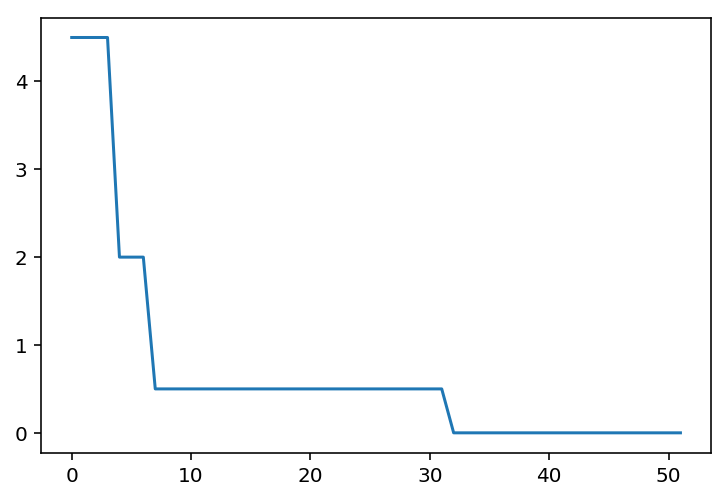

In [21]:
temp = mse(full)
error = temp.values
error[::-1].sort()
error
plt.plot(error)

In [22]:
print( lambda x,y : full[[]])

<function <lambda> at 0x1187eb510>


In [23]:
df_sim_error_dist = full[['sim','error']]
df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
mi = df_sim_error_dist.error.min()
mx = df_sim_error_dist.error.max()
df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


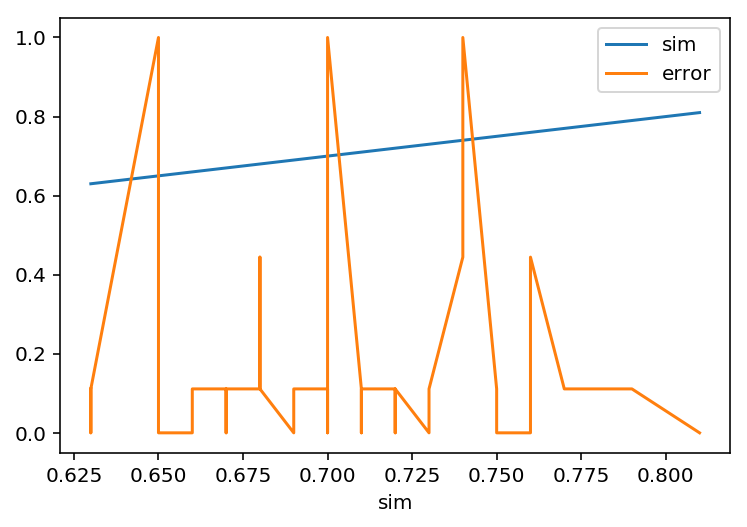

In [24]:
df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
df_sim_error_dist.plot()

In [25]:
def itrate():
    qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
    #print(qList)
    #print(len( casebase.split(',')))
    df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
    df_q_result.dropna( how='all')
    
    max_sim_id = lambda x : extract_data( df_q_result,x)
    full = list(map(max_sim_id, df_q_result.columns))
    full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
    
    df_sim_error_dist = full[['sim','error']]
    df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
    mi = df_sim_error_dist.error.min()
    mx = df_sim_error_dist.error.max()
    df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized
    
    df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
    df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
    df_sim_error_dist.plot()
    return df_sim_error_dist

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


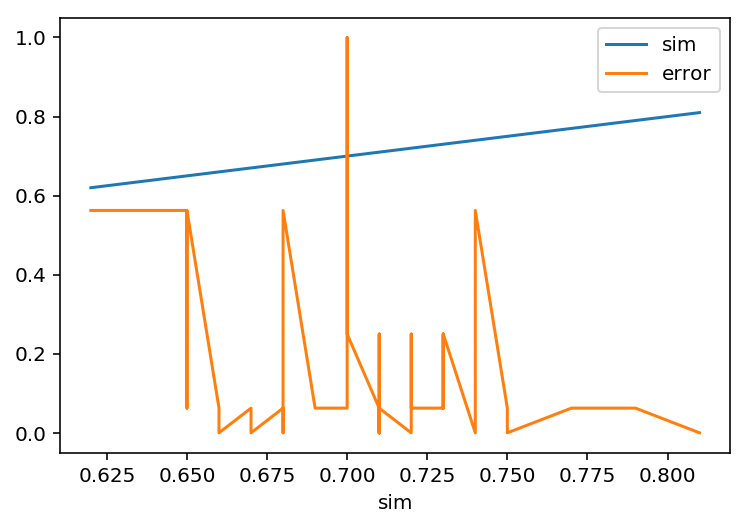

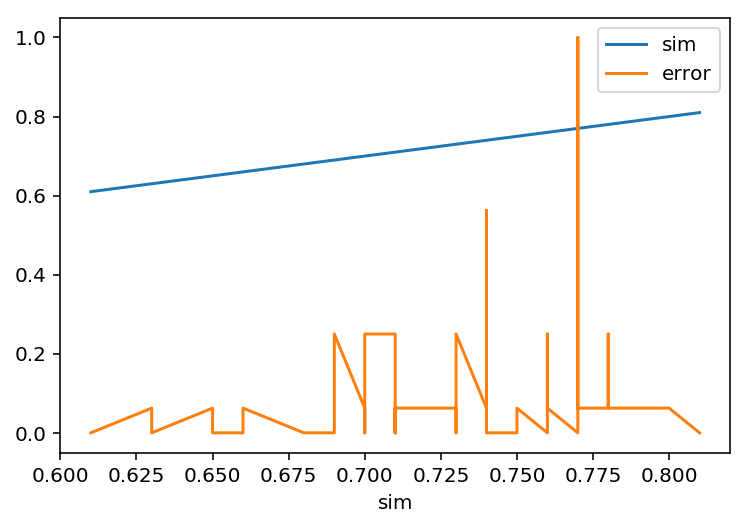

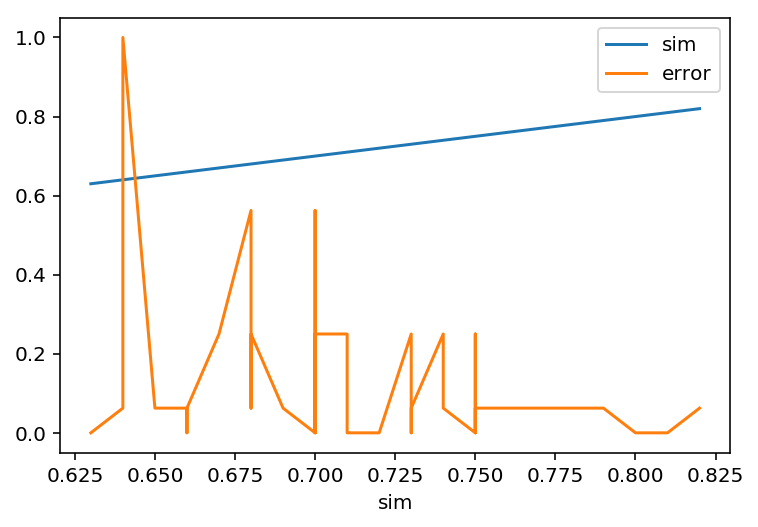

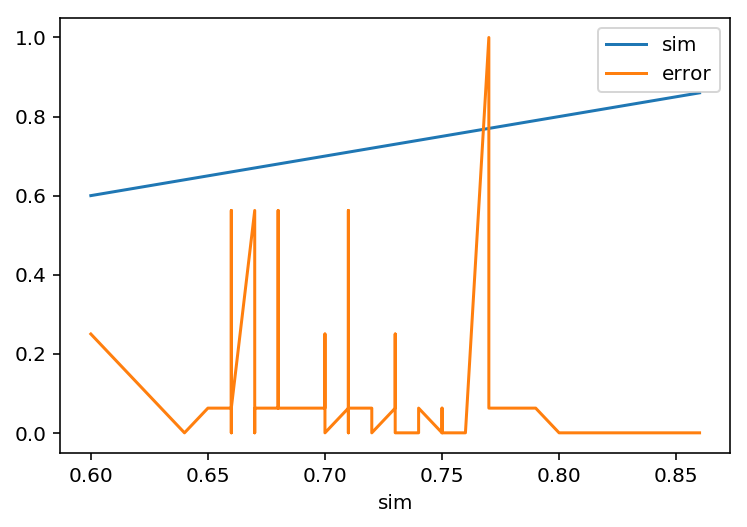

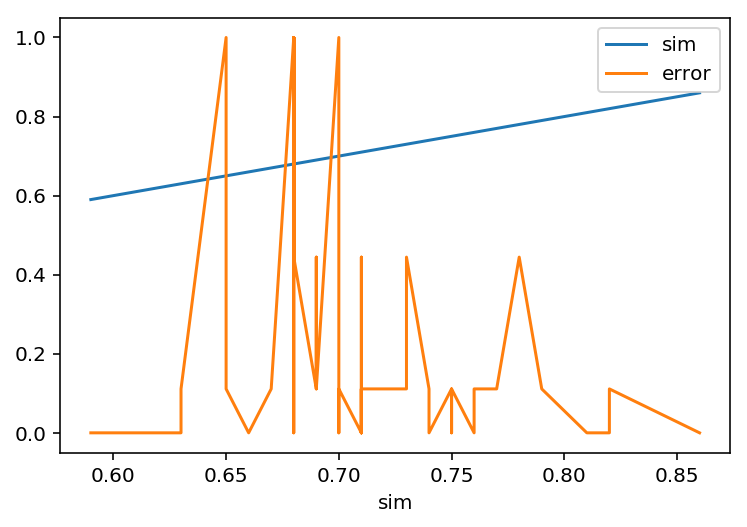

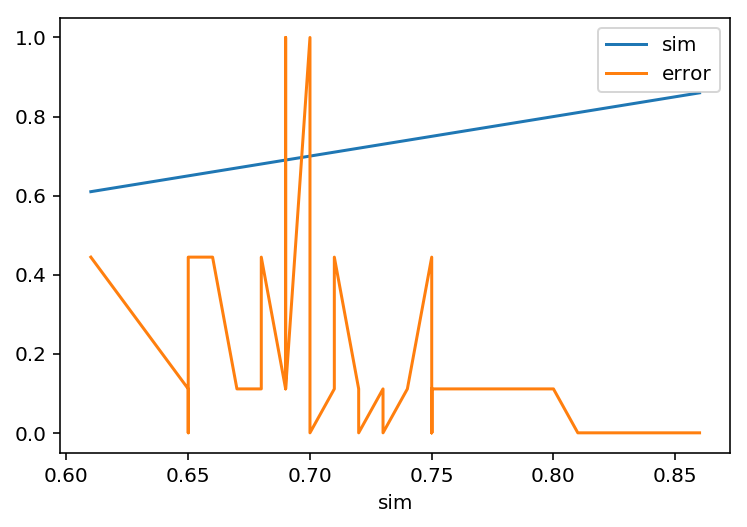

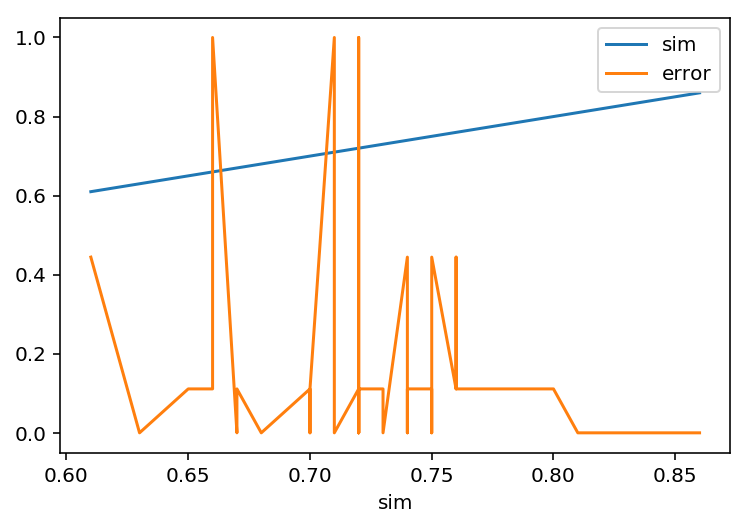

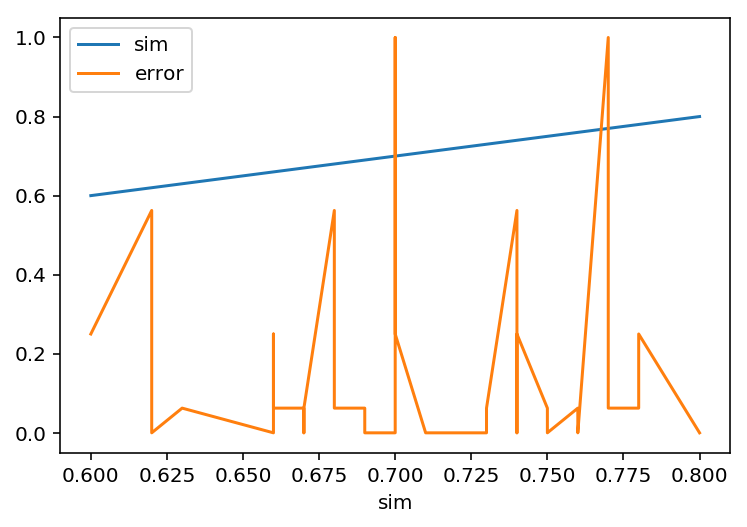

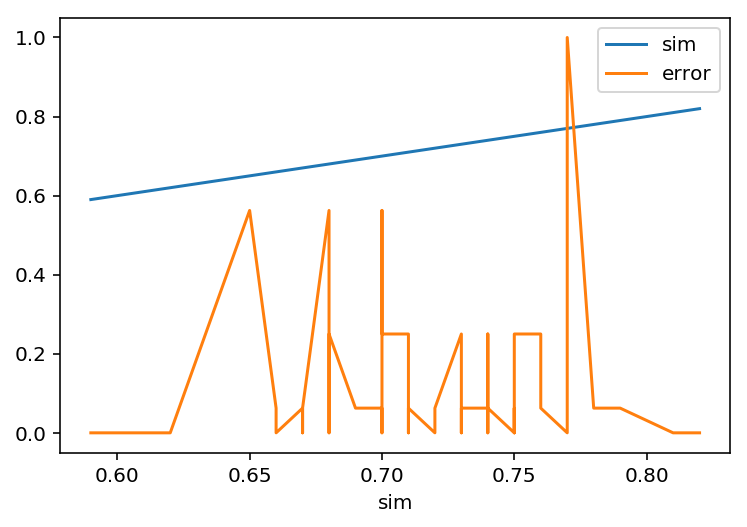

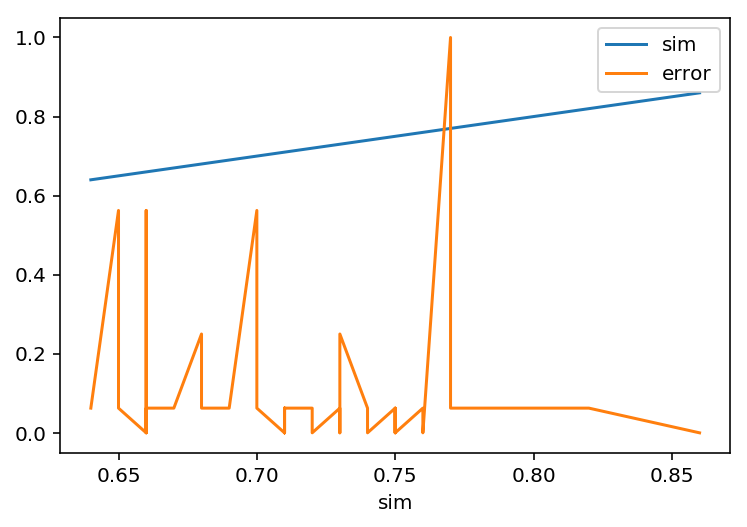

In [26]:
df_1 = itrate()
df_2 = itrate()
df_3 = itrate()
df_4 = itrate()
df_5 = itrate()
df_6 = itrate()
df_7 = itrate()
df_8 = itrate()
df_9 = itrate()
df_10 = itrate()